In [ ]:
import pandas as pd

In [ ]:
data_info = pd.read_csv('/content/drive/MyDrive/Deep_learning-datasets/lending_club_info.csv')

In [ ]:
data_info = data_info.set_index('LoanStatNew')

In [ ]:
print(data_info.index)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object', name='LoanStatNew')


In [ ]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [ ]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [ ]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [ ]:
feat_info('mort_acc')

Number of mortgage accounts.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep_learning-datasets/lending_club_loan_two.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<Axes: xlabel='loan_status', ylabel='count'>

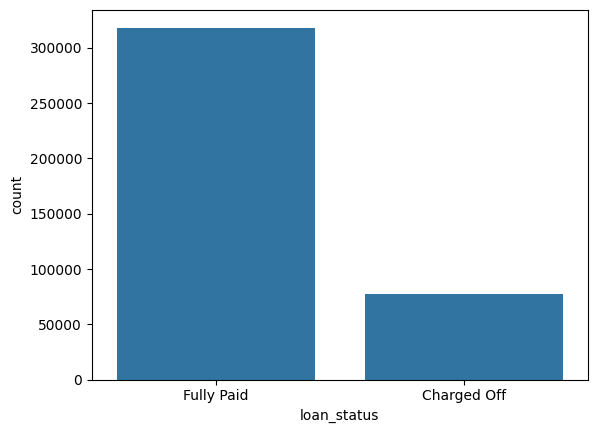

In [ ]:
sns.countplot(x='loan_status',data=df)

<Axes: xlabel='loan_amnt', ylabel='Count'>

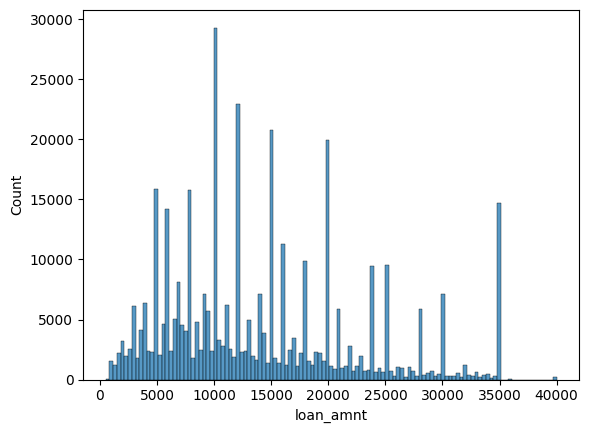

In [ ]:
sns.histplot(data=df,x='loan_amnt')

In [ ]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

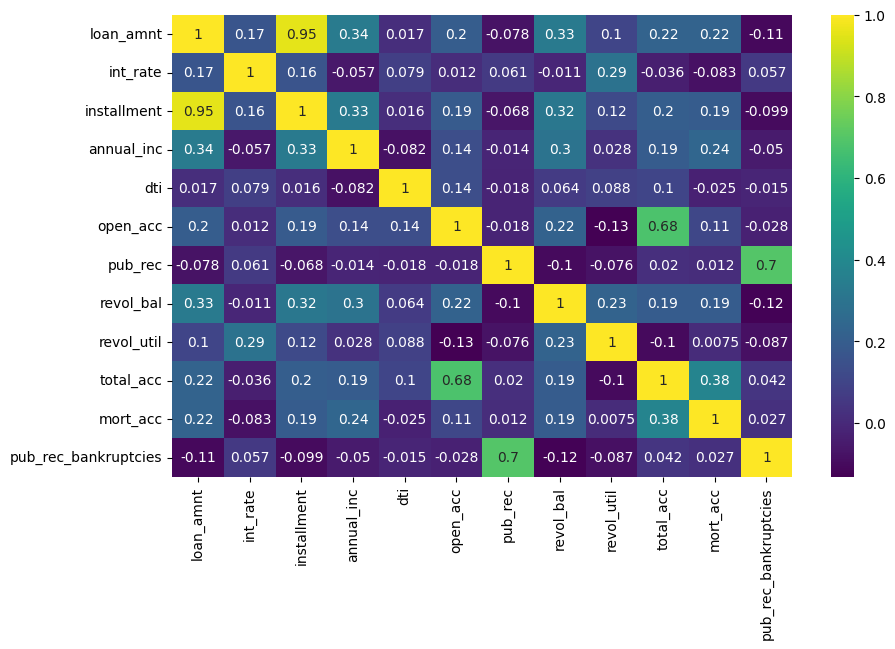

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),cmap='viridis',annot=True)

In [ ]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [ ]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

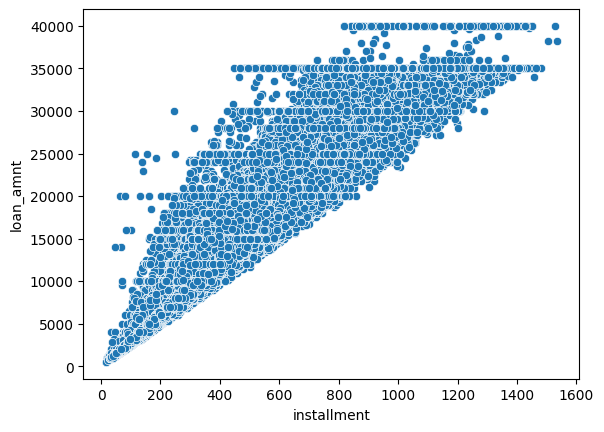

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

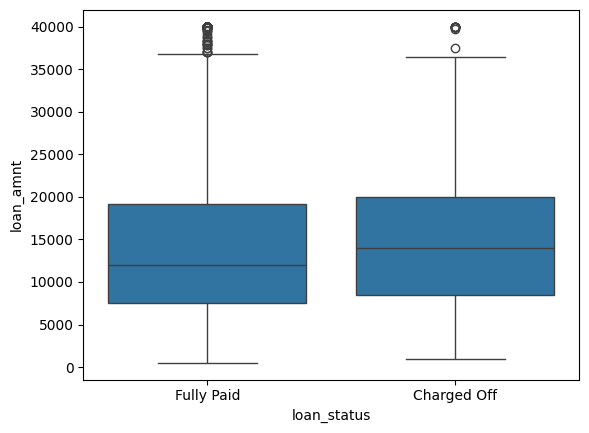

In [ ]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

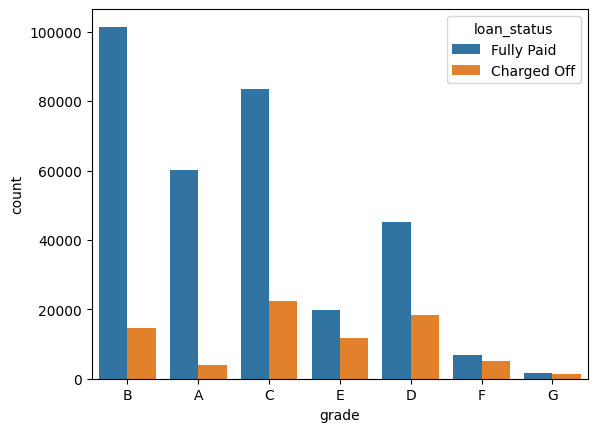

In [ ]:
sns.countplot(data=df,x='grade',hue='loan_status')

In [ ]:
df=df.sort_values(by='sub_grade')

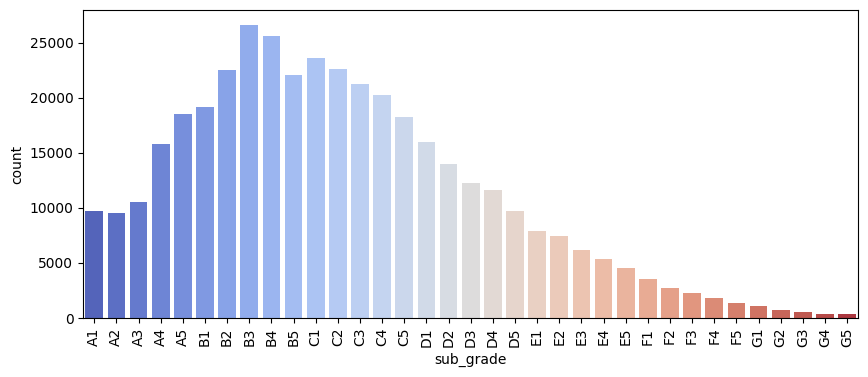

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x=df['sub_grade'],hue=df['sub_grade'],palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

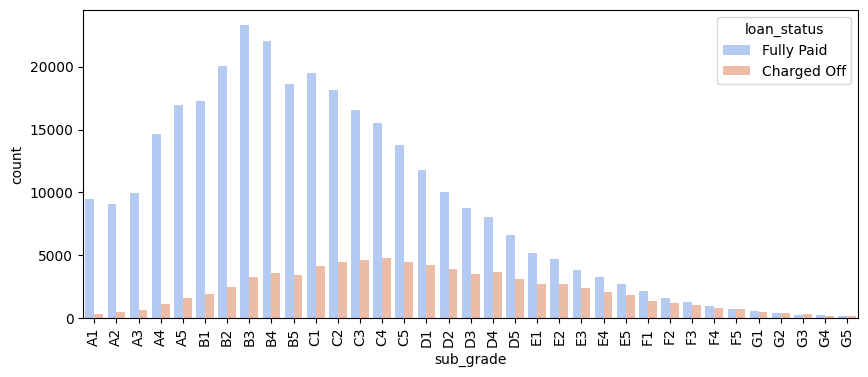

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x=df['sub_grade'],hue='loan_status',palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

In [ ]:
f_and_g=df[(df['grade']=='F') | (df['grade']=='G')]

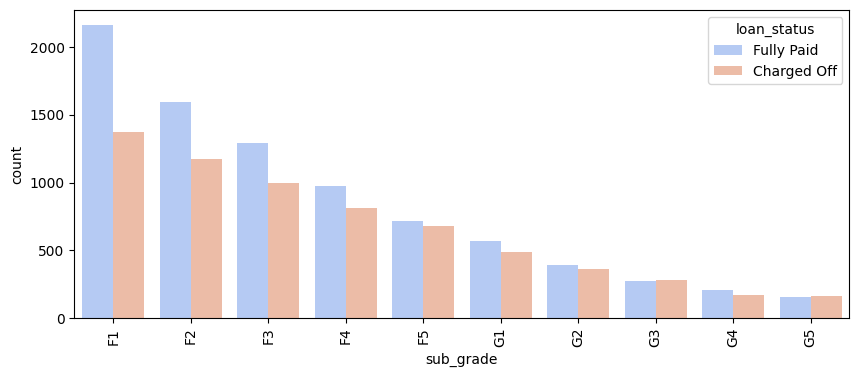

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=f_and_g,x='sub_grade',hue='loan_status',palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['loan_repaid'] = df['loan_status']=='Fully Paid'
df['loan_repaid'] = df['loan_repaid'].astype(int)
df['loan_repaid'].value_counts()

,count
loan_repaid,
1,318357
0,77673


In [ ]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
58544,1,Fully Paid
175506,1,Fully Paid
288495,1,Fully Paid
288492,0,Charged Off
288466,1,Fully Paid
...,...,...
282167,1,Fully Paid
216979,1,Fully Paid
86141,1,Fully Paid
42590,0,Charged Off


<Axes: >

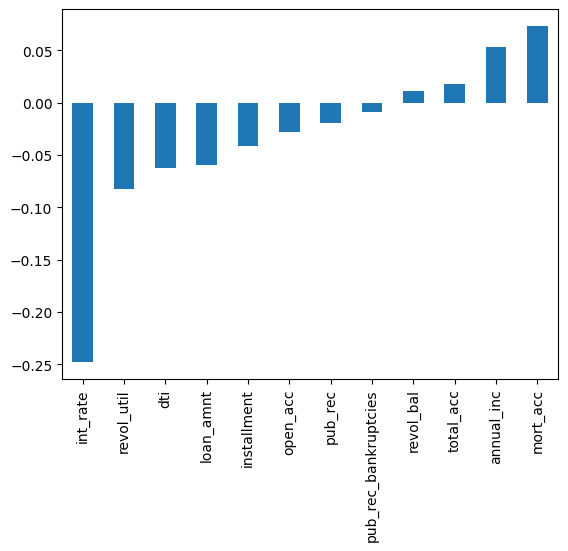

In [ ]:
df.corr(numeric_only=True)['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [ ]:
len(df)

396030

In [ ]:
100 * df.isnull().sum()/len(df)

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


In [ ]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [ ]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [ ]:
df['emp_title'].nunique()

173105

In [ ]:
df['emp_title'].value_counts()

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830
...,...
Photonics Industries International,1
High Point Police Department,1
Long Beach City College Library,1


In [ ]:
df = df.drop('emp_title',axis=1)

In [ ]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

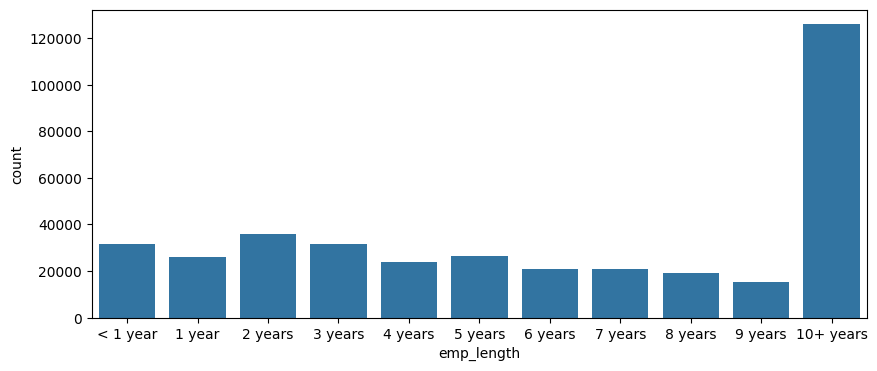

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='emp_length',order=emp_length_order)
plt.show()

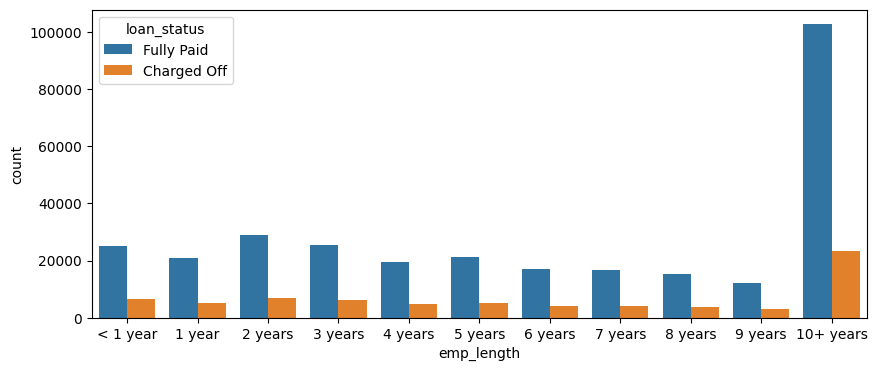

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='emp_length',order=emp_length_order,hue='loan_status')
plt.show()

In [ ]:
df_charged_off = df[df['loan_status']=='Charged Off']

In [ ]:
df_co_count = df_charged_off.groupby('emp_length')['loan_status'].count()

In [ ]:
df_fully_paid = df[df['loan_status']=='Fully Paid']

In [ ]:
df_fp_count = df_fully_paid.groupby('emp_length')['loan_status'].count()

In [ ]:
df_co_count

,loan_status
emp_length,
1 year,5154
10+ years,23215
2 years,6924
3 years,6182
4 years,4608
5 years,5092
6 years,3943
7 years,4055
8 years,3829


In [ ]:
df_fp_count

,loan_status
emp_length,
1 year,20728
10+ years,102826
2 years,28903
3 years,25483
4 years,19344
5 years,21403
6 years,16898
7 years,16764
8 years,15339


In [ ]:
df_co_count/df_fp_count

,loan_status
emp_length,
1 year,0.248649
10+ years,0.225770
2 years,0.239560
3 years,0.242593
4 years,0.238213
5 years,0.237911
6 years,0.233341
7 years,0.241887
8 years,0.249625


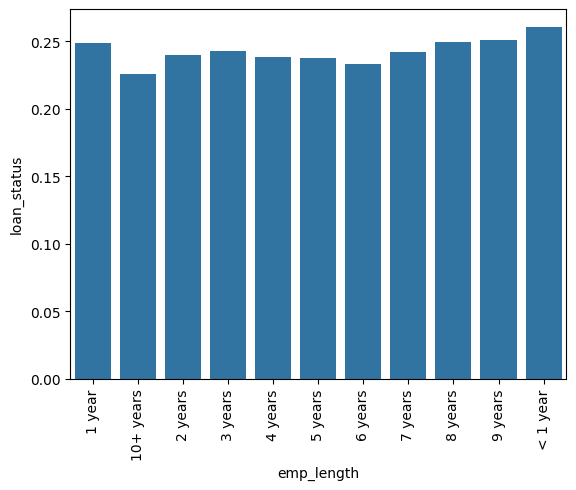

In [ ]:
sns.barplot(x=df_co_count.index,y=df_co_count/df_fp_count)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = df.drop('emp_length',axis=1)

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [ ]:
df['purpose'].head(10)

,purpose
58544,major_purchase
175506,debt_consolidation
288495,credit_card
288492,debt_consolidation
288466,credit_card
250857,debt_consolidation
101618,debt_consolidation
288438,debt_consolidation
288506,debt_consolidation
288402,credit_card


In [ ]:
df['title'].head(10)

,title
58544,Pay Off
175506,Debt consolidation
288495,Credit card refinancing
288492,Debt consolidation
288466,Credit card refinancing
250857,Debt consolidation
101618,personal
288438,Bill repayment
288506,Debt Consolidation 2
288402,CCRefinance


In [ ]:
df = df.drop('title',axis=1)

In [ ]:
feat_info('mort_acc')

Number of mortgage accounts.


In [ ]:
df['mort_acc'].value_counts()

,count
mort_acc,
0.0,139777
1.0,60416
2.0,49948
3.0,38049
4.0,27887
5.0,18194
6.0,11069
7.0,6052
8.0,3121


In [ ]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

,mort_acc
int_rate,-0.082583
dti,-0.025439
revol_util,0.007514
pub_rec,0.011552
pub_rec_bankruptcies,0.027239
loan_repaid,0.073111
open_acc,0.109205
installment,0.193694
revol_bal,0.194925
loan_amnt,0.222315


In [ ]:
df.groupby('total_acc')['mort_acc'].mean()

,mort_acc
total_acc,
2.0,0.000000
3.0,0.052023
4.0,0.066743
5.0,0.103289
6.0,0.151293
...,...
124.0,1.000000
129.0,1.000000
135.0,3.000000


In [ ]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [ ]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.

    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [ ]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [ ]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})

In [ ]:
df = df.drop('grade',axis=1)

In [ ]:
sub_grades = pd.get_dummies(df['sub_grade'],drop_first=True)

In [ ]:
df = pd.concat([df,sub_grades],axis=1)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [ ]:
df['verification_status'].value_counts()

,count
verification_status,
Verified,139451
Source Verified,131301
Not Verified,124467


In [ ]:
verification_status = pd.get_dummies(df['verification_status'],drop_first=True)

In [ ]:
df = pd.concat([df,verification_status],axis=1)

In [ ]:
df['application_type'].value_counts()

,count
application_type,
INDIVIDUAL,394508
JOINT,425
DIRECT_PAY,286


In [ ]:
application_type = pd.get_dummies(df['application_type'],drop_first=True)

In [ ]:
df = pd.concat([df,application_type],axis=1)

In [ ]:
df['initial_list_status'].value_counts()

,count
initial_list_status,
f,237346
w,157873


In [ ]:
initial_list_status = pd.get_dummies(df['initial_list_status'],drop_first=True)

In [ ]:
df = pd.concat([df,initial_list_status],axis=1)

In [ ]:
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,234169
credit_card,82923
home_improvement,23961
other,21059
major_purchase,8756
small_business,5656
car,4670
medical,4175
moving,2842


In [ ]:
purpose = pd.get_dummies(df['purpose'],drop_first=True)

In [ ]:
df = pd.concat([df,purpose],axis=1)

In [ ]:
len(df.columns)

76

In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198022
RENT,159395
OWN,37660
OTHER,110
NONE,29
ANY,3


In [ ]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198022
RENT,159395
OWN,37660
OTHER,142


In [ ]:
home_ownership = pd.get_dummies(df['home_ownership'],drop_first=True)

In [ ]:
df = pd.concat([df,home_ownership],axis=1)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [ ]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [ ]:
df['zip_code'].value_counts()

,count
zip_code,
70466,56880
22690,56413
30723,56402
48052,55811
00813,45725
29597,45393
05113,45300
11650,11210
93700,11126


In [ ]:
zip_code = pd.get_dummies(df['zip_code'],drop_first=True)

In [ ]:
df = pd.concat([df,zip_code],axis=1)

In [ ]:
 df = df.drop(['address','zip_code','home_ownership','verification_status','application_type',
          'initial_list_status','purpose','sub_grade'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 58544 to 380429
Data columns (total 81 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   annual_inc            395219 non-null  float64
 5   issue_d               395219 non-null  object 
 6   loan_status           395219 non-null  object 
 7   dti                   395219 non-null  float64
 8   earliest_cr_line      395219 non-null  object 
 9   open_acc              395219 non-null  float64
 10  pub_rec               395219 non-null  float64
 11  revol_bal             395219 non-null  float64
 12  revol_util            395219 non-null  float64
 13  total_acc             395219 non-null  float64
 14  mort_acc              395219 non-null  float64
 15  p

In [ ]:
df = df.drop('issue_d',axis=1)

In [ ]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [ ]:
df = df.drop('earliest_cr_line',axis=1)

In [ ]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [ ]:
df = df.drop('loan_status',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar = MinMaxScaler()

In [ ]:
scaled_X_train = scalar.fit_transform(X_train)

In [ ]:
scaled_X_test = scalar.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
scaled_X_train.shape

(316175, 78)

In [ ]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_X_train,y=y_train,epochs=25,batch_size=256,validation_data=(scaled_X_test,y_test))

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8531 - loss: 0.3558 - val_accuracy: 0.8872 - val_loss: 0.2649
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8887 - loss: 0.2660 - val_accuracy: 0.8872 - val_loss: 0.2616
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8880 - loss: 0.2635 - val_accuracy: 0.8873 - val_loss: 0.2621
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8891 - loss: 0.2607 - val_accuracy: 0.8872 - val_loss: 0.2613
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8892 - loss: 0.2601 - val_accuracy: 0.8872 - val_loss: 0.2611
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8888 - loss: 0.2607 - val_accuracy: 0.8872 - val_loss: 0.2608
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8887 - loss: 0.2597 - val_accuracy: 0.8874 - val_loss: 0.2605
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8875 - loss: 0.2616 -

In [ ]:
model.save('/content/drive/MyDrive/Deep_learning-datasets/loan_repay_model.keras')

In [ ]:
from keras.models import load_model

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/Deep_learning-datasets/loan_repay_model.keras')

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

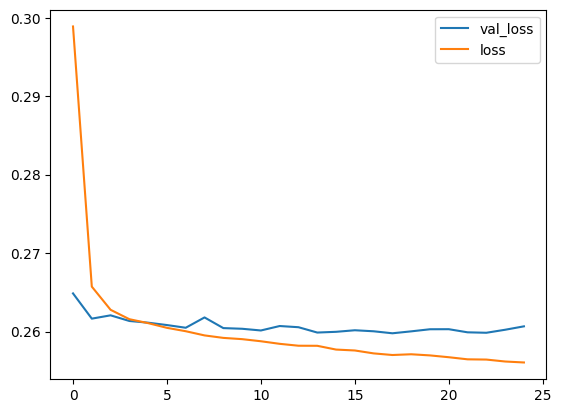

In [ ]:
losses[['val_loss','loss']].plot()

In [ ]:
predictions = loaded_model.predict(scaled_X_test)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     15666
           1       0.88      1.00      0.93     63378

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
confusion_matrix(y_test,predictions.round())

array([[ 6971,  8695],
       [  219, 63159]])

In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

,180516
loan_amnt,12700.0
term,60
int_rate,14.91
installment,301.54
annual_inc,50000.0
...,...
48052,False
70466,False
86630,False
93700,False


In [ ]:
new_customer = scalar.transform([new_customer.values])

In [ ]:
new_customer

array([[0.30490134, 1.        , 0.37358785, 0.18605097, 0.00657895,
        0.00247925, 0.15730337, 0.        , 0.01282893, 0.25359477,
        0.28187919, 0.09085377, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
loan_repaid = loaded_model.predict(new_customer)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [ ]:
loan_repaid.round()

array([[0.]], dtype=float32)

In [ ]:
# This person will not repay loan

In [ ]:
df.iloc[random_ind]['loan_repaid']

0